# Hinged beam

::::::{attention}
This page shows a preview of the assignment. Please fork and clone the assignment to work on it locally from [GitHub](https://github.com/CIEM5000-2025/practice-assignments)
::::::

::::::{versionadded} v2025.2.0 After workshop 2
Solutions additional assignments in text and downloads 
::::::

```{custom_download_link} ./hinged_beam_stripped.ipynb
:text: ".ipynb"
:replace_default: "True"
```

```{custom_download_link} ./hinged_beam_stripped_sol.ipynb
:text: ".ipynb"
:replace_default: "False"
```

```{custom_download_link} ./hinged_beam.md
:text: ".md:myst"
:replace_default: "False"
```

```{custom_download_link} https://github.com/CIEM5000-2025/practice-assignments
:text: "All files practice assignments"
:replace_default: "False"
```

```{custom_download_link} https://github.com/CIEM5000-2025/practice-assignments/tree/solution_additional_exercises
:text: "All files practice assignments with solutions additional exercises"
:replace_default: "False"
```

Given is the following beam {cite:p}`additional_Hans`:

```{figure} https://raw.githubusercontent.com/ibcmrocha/public/main/hingedbeam.png
:align: center
:width: 400
```

With:
- $EI = 8000$


```{exercise-start} Hinged beam
:label: exercise_hinged_beam
:nonumber: true
```

Solve this problem. How do you deal with the hinges?

In [ ]:
import matplotlib as plt
import numpy as np
sys.path.insert(1, '/matrixmethod_solution')
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [1]:
import matplotlib as plt
import numpy as np
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [ ]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [ ]:
#YOUR_CODE_HERE

```{exercise-end}
```

```{solution-start} exercise_hinged_beam
:class: dropdown
```

- The point load halfway node 3 and 4 can be modelled by adding another node
- For the hinges, a beam element is derived with an undefined $\varphi$ at the left end and a corresponding end moment of $0$

In [2]:
import sympy as sym

In [ ]:
import sympy as sym
sym.init_printing()

In [3]:
EI, q_z, x = sym.symbols('EI, q_z, x')
L = sym.symbols('L',positive=True)
w = sym.Function('w')

ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_z)
display(ODE_bending)

w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)
phi = -w.diff(x)
kappa = phi.diff(x)
M = EI*kappa
V = M.diff(x)

w_1, w_2, phi_1, phi_2 = sym.symbols('w_1, w_2, phi_1, phi_2')
eq1 = sym.Eq(w.subs(x,0),w_1)
eq2 = sym.Eq(w.subs(x,L),w_2)
eq3 = sym.Eq(M.subs(x,0),0)
eq4 = sym.Eq(phi.subs(x,L),phi_2)
C_sol = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
for key in C_sol:
    display(sym.Eq(key, C_sol[key]))

display(sym.collect(M.subs(C_sol).expand(),[w_1,w_2,phi_1,phi_2]))
display(sym.collect(w.subs(C_sol).expand(),[w_1,w_2,phi_1,phi_2]))

F_1_z, F_2_z, T_1_y, T_2_y = sym.symbols('F_1_z, F_2_z, T_1_y, T_2_y')

eq5 = sym.Eq(-V.subs(C_sol).subs(x,0), F_1_z)
eq6 = sym.Eq(V.subs(C_sol).subs(x,L), F_2_z)
eq7 = sym.Eq(-M.subs(C_sol).subs(x,0), T_1_y)
eq8 = sym.Eq(M.subs(C_sol).subs(x,L), T_2_y)
display(eq5, eq6, eq7, eq8)

A, b = sym.linear_eq_to_matrix([eq5,eq7, eq6, eq8], [w_1, phi_1, w_2, phi_2])
display(A,b)

Eq(EI*Derivative(w(x), (x, 4)), q_z)

C1 + C2*x + C3*x**2 + C4*x**3 + q_z*x**4/(24*EI)

Eq(C1, w_1)

Eq(C2, (24*EI*L*phi_2 - 72*EI*w_1 + 72*EI*w_2 + L**4*q_z)/(48*EI*L))

Eq(C3, 0)

Eq(C4, (-8*EI*L*phi_2 + 8*EI*w_1 - 8*EI*w_2 - L**4*q_z)/(16*EI*L**3))

3*EI*phi_2*x/L**2 - 3*EI*w_1*x/L**3 + 3*EI*w_2*x/L**3 + 3*L*q_z*x/8 - q_z*x**2/2

phi_2*(x/2 - x**3/(2*L**2)) + w_1*(1 - 3*x/(2*L) + x**3/(2*L**3)) + w_2*(3*x/(2*L) - x**3/(2*L**3)) + L**3*q_z*x/(48*EI) - L*q_z*x**3/(16*EI) + q_z*x**4/(24*EI)

Eq(3*(-8*EI*L*phi_2 + 8*EI*w_1 - 8*EI*w_2 - L**4*q_z)/(8*L**3), F_1_z)

Eq(EI*(-L*q_z/EI - 3*(-8*EI*L*phi_2 + 8*EI*w_1 - 8*EI*w_2 - L**4*q_z)/(8*EI*L**3)), F_2_z)

Eq(0, T_1_y)

Eq(EI*(-L**2*q_z/(2*EI) - 3*(-8*EI*L*phi_2 + 8*EI*w_1 - 8*EI*w_2 - L**4*q_z)/(8*EI*L**2)), T_2_y)

Matrix([
[ 3*EI/L**3, 0, -3*EI/L**3, -3*EI/L**2],
[         0, 0,          0,          0],
[-3*EI/L**3, 0,  3*EI/L**3,  3*EI/L**2],
[-3*EI/L**2, 0,  3*EI/L**2,     3*EI/L]])

Matrix([
[ F_1_z + 3*L*q_z/8],
[             T_1_y],
[ F_2_z + 5*L*q_z/8],
[L**2*q_z/8 + T_2_y]])

- So, the new stiffness matrix will be $\left[\begin{matrix}\frac{3 EI}{L^{3}} & 0 & - \frac{3 EI}{L^{3}} & - \frac{3 EI}{L^{2}}\\0 & 0 & 0 & 0\\- \frac{3 EI}{L^{3}} & 0 & \frac{3 EI}{L^{3}} & \frac{3 EI}{L^{2}}\\- \frac{3 EI}{L^{2}} & 0 & \frac{3 EI}{L^{2}} & \frac{3 EI}{L}\end{matrix}\right]$
- The new equivalent load vector will be $\left[\begin{matrix} \frac{3 L q_{z}}{8}\\0\\\frac{5 L q_{z}}{8}\\\frac{L^{2} q_{z}}{8} \end{matrix}\right]$
- The new expression for $M$ is $\frac{3 EI \phi_{2} x}{L^{2}} - \frac{3 EI w_{1} x}{L^{3}} + \frac{3 EI w_{2} x}{L^{3}} + \frac{3 L q_{z} x}{8} - \frac{q_{z} x^{2}}{2}$
- The new expression for $w$ is $\phi_{2} \left(\frac{x}{2} - \frac{x^{3}}{2 L^{2}}\right) + w_{1} \cdot \left(1 - \frac{3 x}{2 L} + \frac{x^{3}}{2 L^{3}}\right) + w_{2} \cdot \left(\frac{3 x}{2 L} - \frac{x^{3}}{2 L^{3}}\right) + \frac{L^{3} q_{z} x}{48 EI} - \frac{L q_{z} x^{3}}{16 EI} + \frac{q_{z} x^{4}}{24 EI}
$
- These changes have been implemented in the `hinged_element` class in [`./matrixmethod/elements.py`](exercise_hinged_beam_py).

In [4]:
mm.Node.clear()
mm.Element.clear()

EI = 8000

nodes = []

nodes.append(mm.Node(0,0))
nodes.append(mm.Node(3,0))
nodes.append(mm.Node(5,0))
nodes.append(mm.Node(7,0))
nodes.append(mm.Node(9,0))
nodes.append(mm.Node(13,0))
nodes.append(mm.Node(16,0))

elems = []

elems.append(mm.Element(nodes[0], nodes[1]))
elems.append(mm.hinged_element(nodes[1], nodes[2]))
elems.append(mm.Element(nodes[2], nodes[3]))
elems.append(mm.Element(nodes[3], nodes[4]))
elems.append(mm.hinged_element(nodes[4], nodes[5]))
elems.append(mm.Element(nodes[5], nodes[6]))

section = {}
section['EI'] = EI
for elem in elems:
    elem.set_section (section)

elems[2].add_distributed_load([0,8])
elems[3].add_distributed_load([0,8])

con = mm.Constrainer()

con.fix_dof (nodes[0], 1)
con.fix_dof (nodes[2], 1)
con.fix_node (nodes[6])

nodes[1].add_load ([0,15,0])
nodes[3].add_load ([0,5,0])
nodes[5].add_load ([0,10,0])

print(con)
for elem in elems:
    print(elem)

global_k = np.zeros ((3*len(nodes), 3*len(nodes)))
global_f = np.zeros (3*len(nodes))

for e in elems:
    elmat = e.stiffness()
    idofs = e.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for n in nodes:
    global_f[n.dofs] += n.p

Kff, Ff = con.constrain ( global_k, global_f )
u = np.matmul ( np.linalg.inv(Kff), Ff )
print(u)

print(con.support_reactions(global_k,u,global_f))

This constrainer has constrained the degrees of freedom: [1, 7, 18, 19, 20] with corresponding constrained values: [0, 0, 0, 0, 0])
Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=3,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[ 0. 15.  0.]
Element connecting:
node #1:
 This node has:
 - x coordinate=3,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[ 0. 15.  0.]
with node #2:
 This node has:
 - x coordinate=5,
 - z coordinate=0,
 - degrees of freedom=[6, 7, 8],
 - load vector=[ 0.          8.         -2.66666667]
Element connecting:
node #1:
 This node has:
 - x coordinate=5,
 - z coordinate=0,
 - degrees of freedom=[6, 7, 8],
 - load vector=[ 0.          8.         -2.66666667]
with node #2:
 This node has:
 - x coordinate=7,
 - z coordinate=0,
 - degrees of freedom=[9, 10, 11],
 - load vector=[ 0. 21.  

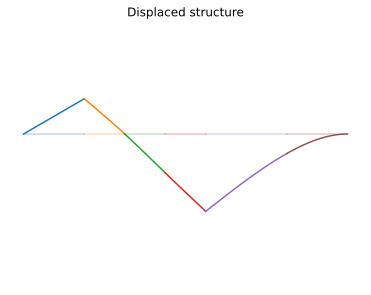

In [5]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=20)

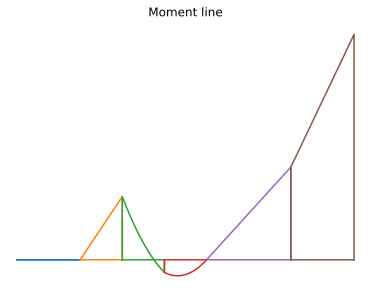

In [6]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=51,global_c=True,scale=0.1)

```{solution-end}
```